In [2]:
import pandas as pd

In [3]:
stock = pd.read_csv('week3.csv')

In [4]:
stock

,Date,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,Day_Perc_Change,Trend,avg,upper,lower
0,2017-05-15,0,INFRATEL,EQ,374.70,375.80,375.80,368.65,372.00,371.05,...,27740,357531,46.98,2017,5,0.000000,Slight or No change,NaN,NaN,NaN
1,2017-05-16,1,INFRATEL,EQ,371.05,371.15,380.85,370.05,375.75,376.55,...,42924,677288,50.30,2017,5,1.482280,Positive,NaN,NaN,NaN
2,2017-05-17,2,INFRATEL,EQ,376.55,377.60,396.50,375.10,388.95,389.90,...,83975,1371275,60.46,2017,5,3.545346,Among top gainers,NaN,NaN,NaN
3,2017-05-18,3,INFRATEL,EQ,389.90,388.40,388.85,377.00,378.55,378.90,...,50270,1025637,50.91,2017,5,-2.821236,Negative,NaN,NaN,NaN
4,2017-05-19,4,INFRATEL,EQ,378.90,381.10,387.50,374.85,379.40,378.95,...,63099,1020560,50.24,2017,5,0.013196,Slight or No change,NaN,NaN,NaN
5,2017-05-22,5,INFRATEL,EQ,378.95,383.70,389.30,376.15,388.20,387.95,...,73071,1228540,44.31,2017,5,2.374984,Positive,NaN,NaN,NaN
6,2017-05-23,6,INFRATEL,EQ,387.95,385.00,390.00,378.40,379.90,379.85,...,60957,2039492,53.51,2017,5,-2.087898,Negative,NaN,NaN,NaN
7,2017-05-24,7,INFRATEL,EQ,379.85,379.85,382.00,367.20,368.45,369.00,...,83856,1860115,59.35,2017,5,-2.856391,Negative,NaN,NaN,NaN
8,2017-05-25,8,INFRATEL,EQ,369.00,369.10,376.35,365.85,368.70,373.50,...,89929,6053646,83.06,2017,5,1.219512,Positive,NaN,NaN,NaN
9,2017-05-26,9,INFRATEL,EQ,373.50,370.00,377.20,366.30,369.50,369.95,...,43541,788763,41.11,2017,5,-0.950469,Slight negative,NaN,NaN,NaN


In [5]:
stock.columns

Index(['Date', 'Unnamed: 0', 'Symbol', 'Series', 'Prev Close', 'Open Price',
       'High Price', 'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total_Traded_Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'year', 'month', 'Day_Perc_Change', 'Trend',
       'avg', 'upper', 'lower'],
      dtype='object')

In [6]:
stock.dropna(inplace  = True)
stock.reset_index(drop = True, inplace = True)

In [7]:
for ind, row in stock.iterrows():
    if stock.loc[ind, 'Average Price']<=stock.loc[ind,'lower']:
        stock.loc[ind, "Call"] = 'Buy'
    elif (stock.loc[ind,'lower']<stock.loc[ind, 'Average Price'])and (stock.loc[ind, 'Average Price']<=stock.loc[ind,'avg']):
        stock.loc[ind, "Call"] = 'Hold Buy/ Liquidate Short'
    elif (stock.loc[ind,'avg']<stock.loc[ind, 'Average Price'])and (stock.loc[ind, 'Average Price']<stock.loc[ind,'upper']):
        stock.loc[ind, "Call"] = 'Hold Short/ Liquidate Buy'
    elif stock.loc[ind, 'Average Price']>=stock.loc[ind,'upper']:
        stock.loc[ind, "Call"] = 'Short'

In [8]:
stock[['Average Price','lower','avg','upper','Call']]

,Average Price,lower,avg,upper,Call
0,375.07,362.894,376.432,389.971,Hold Buy/ Liquidate Short
1,376.87,363.458,376.689,389.921,Hold Short/ Liquidate Buy
2,381.61,363.527,377.111,390.694,Hold Short/ Liquidate Buy
3,384.02,364.612,376.629,388.645,Hold Short/ Liquidate Buy
4,383.79,364.458,376.936,389.414,Hold Short/ Liquidate Buy
5,378.44,364.468,377.000,389.532,Hold Short/ Liquidate Buy
6,381.29,365.248,376.621,387.995,Hold Short/ Liquidate Buy
7,382.05,364.890,376.971,389.052,Hold Short/ Liquidate Buy
8,384.56,366.335,378.057,389.779,Hold Short/ Liquidate Buy
9,384.75,366.815,378.957,391.099,Hold Short/ Liquidate Buy


In [10]:
stock.dtypes

Date                       object
Unnamed: 0                  int64
Symbol                     object
Series                     object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total_Traded_Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
year                        int64
month                       int64
Day_Perc_Change           float64
Trend                      object
avg                       float64
upper                     float64
lower                     float64
Call                       object
dtype: object

In [12]:
x = stock[['Average Price','avg','upper','lower']]
y = stock['Call']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

## Predictions using Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf_D = DecisionTreeClassifier()

In [16]:
clf_D.fit(x_train, y_train.astype(str))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
clf_D.score(x_test, y_test.astype(str))

0.7851239669421488

## Predictions using Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
Rclf = RandomForestClassifier()

In [20]:
Rclf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
Rclf.score(x_test, y_test)

0.8099173553719008

In [22]:
Rclf.score(x_train, y_train)

0.9805555555555555

## Predictions using Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
y_pred = mnb.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 0,  6,  0,  0],
       [ 0, 62,  0,  0],
       [ 0, 37, 11,  0],
       [ 0,  2,  3,  0]], dtype=int64)

In [27]:
mnb.score(x_test, y_test)

0.6033057851239669

## Predictions using SVM

In [28]:
from sklearn.svm import SVC

In [29]:
svc = SVC(kernel = 'linear',C=1).fit(x_train,y_train)

In [30]:
svc.score(x_test,y_test)

0.9917355371900827

## Importing another stock data and creating the bollinger columns. Using the already defined model, predicting the daily calls for this new stock.

In [31]:
stock2 = pd.read_csv('Large_Cap/TCS.csv')

In [32]:
import numpy as np

In [33]:
stock2 = stock2[stock2['Series'] == 'EQ']

In [34]:
stock2['Date'] = stock2.Date.astype('datetime64')

In [35]:
stock2.index = stock2.Date

In [36]:
stock2.rename(columns = {'Total Traded Quantity':'Total_Traded_Quantity'}, inplace = True)

In [37]:
stock2['year'] = stock2['Date'].dt.year
stock2['month'] = stock2['Date'].dt.month

In [38]:
stock2['Day_Perc_Change'] = stock2['Close Price'].pct_change()*100
stock2['Day_Perc_Change'].fillna(0, inplace = True)

In [39]:
for ind, row in stock2.iterrows():
    if -0.5<stock2.loc[ind, 'Day_Perc_Change']<0.5:
        stock2.loc[ind, "Trend"] = 'Slight or No change'
    elif 0.5<stock2.loc[ind,'Day_Perc_Change']<1.0:
        stock2.loc[ind, "Trend"] = 'Slight Positive'
    elif -1.0<stock2.loc[ind,'Day_Perc_Change']<-0.5:
        stock2.loc[ind, "Trend"] = 'Slight negative'
    elif 1<stock2.loc[ind,'Day_Perc_Change']<3:
        stock2.loc[ind, "Trend"] = 'Positive'
    elif -3<stock2.loc[ind,'Day_Perc_Change']<-1:
        stock2.loc[ind, "Trend"] = 'Negative'
    elif 3<stock2.loc[ind,'Day_Perc_Change']<7:
        stock2.loc[ind, "Trend"] = 'Among top gainers'
    elif -7<stock2.loc[ind,'Day_Perc_Change']<-3:
        stock2.loc[ind, "Trend"] = 'Among top losers'
    elif stock2.loc[ind,'Day_Perc_Change']>7:
        stock2.loc[ind, "Trend"] = 'Bull run'
    elif stock2.loc[ind,'Day_Perc_Change']<-7:
        stock2.loc[ind, "Trend"] = 'Bear drop'

In [40]:
avg = stock2['Close Price'].rolling(14).mean()
sd = stock2['Close Price'].rolling(14).std()
upperBand = avg + (sd*2)
lowerBand = avg - (sd*2)

stock2['avg'] = np.round(avg,3)
stock2['upper'] = np.round(upperBand,3)
stock2['lower'] = np.round(lowerBand,3)

In [41]:
stock2.dropna(inplace  = True)
stock2.reset_index(drop = True, inplace = True)

In [42]:
for ind, row in stock2.iterrows():
    if stock2.loc[ind, 'Average Price']<=stock2.loc[ind,'lower']:
        stock2.loc[ind, "Call"] = 'Buy'
    elif (stock2.loc[ind,'lower']<stock2.loc[ind, 'Average Price'])and (stock2.loc[ind, 'Average Price']<=stock2.loc[ind,'avg']):
        stock2.loc[ind, "Call"] = 'Hold Buy/ Liquidate Short'
    elif (stock2.loc[ind,'avg']<stock2.loc[ind, 'Average Price'])and (stock2.loc[ind, 'Average Price']<stock2.loc[ind,'upper']):
        stock2.loc[ind, "Call"] = 'Hold Short/ Liquidate Buy'
    elif stock2.loc[ind, 'Average Price']>=stock2.loc[ind,'upper']:
        stock2.loc[ind, "Call"] = 'Short'

In [43]:
x2 = stock2[['Average Price','avg','upper','lower']]
y2 = stock2['Call']

In [44]:
svc.score(x2,y2)

0.9604989604989606

## Query 4.2

In [45]:
rel = pd.read_csv('Large_Cap/RELIANCE.csv')

In [46]:
rel['Day_Perc_Change'] = rel['Close Price'].pct_change()*100
rel['Day_Perc_Change'].fillna(0, inplace = True) 

In [47]:
rel['Open-Close'] = (rel['Open Price']-rel['Close Price'])/rel['Open Price']
rel['High-Low'] = (rel['High Price']-rel['Low Price'])/rel['Low Price']
rel['mean_5'] = rel['Day_Perc_Change'].rolling(5).mean()
rel['std_5'] = rel['Day_Perc_Change'].rolling(5).std()
rel.dropna(inplace = True)

In [61]:
rel['Action'] = np.where(rel['Close Price'] > rel['Close Price'].shift(1), -1, 1)

In [62]:
x3 = rel[['Open-Close','High-Low','mean_5','std_5']]
y3 = rel['Action']

In [63]:
result = pd.concat([rel['Close Price'],y3], axis = 1, join = 'inner')
result

,Close Price,Action
4,1318.85,1
5,1324.15,-1
6,1305.55,1
7,1297.70,1
8,1302.45,-1
9,1337.30,-1
10,1356.90,-1
11,1359.35,-1
12,1340.70,1
13,1328.25,1


In [64]:
clf = RandomForestClassifier()
clf.fit(x3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
clf.score(x3_test, y3_test)

0.8536585365853658

In [66]:
from sklearn.metrics import accuracy_score
print('Correct Prediction in percentage:', accuracy_score(y3_test, clf.predict(x3_test), normalize=True)*100.0)

Correct Prediction in percentage: 85.36585365853658


In [67]:
rel['strategy_returns'] = rel['Day_Perc_Change']*clf.predict(x3)

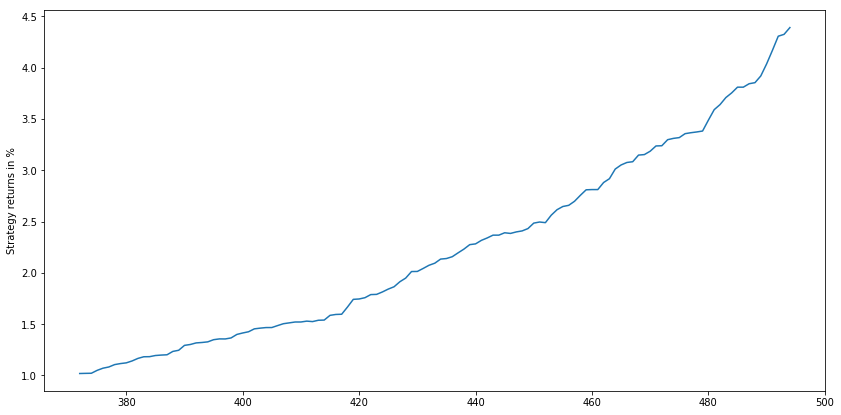

In [72]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,7)
((rel.strategy_returns[y3_train.size:]+100)/100).cumprod().plot()
plt.ylabel('Strategy returns in %')
plt.show()